Import Packages

In [22]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load the Data

In [23]:
parent_dir = '../../../data/philosopher/3/'

N = 1_000
M = 5_000
ITERATIONS = 10
# Load Scala benchmark data
scala_idle_raw_data = pd.read_csv(f'{parent_dir}2/philosopher_akka_actor_benchmark_idle_power.csv')
scala_bench_raw_data = pd.read_csv(f'{parent_dir}2/philosopher_akka_actor_benchmark_power_metrics.csv')

# Load Erlang benchmark data
erlang_idle_raw_data = pd.read_csv(f'{parent_dir}2/philosopher_benchmark_idle_power.csv')
erlang_bench_raw_data = pd.read_csv(f'{parent_dir}2/philosopher_benchmark_power_metrics.csv')

# Replace empty or missing values with "N/A" in non-numeric columns
scala_idle_raw_data.fillna("N/A", inplace=True)
scala_bench_raw_data.fillna("N/A", inplace=True)
erlang_idle_raw_data.fillna("N/A", inplace=True)
erlang_bench_raw_data.fillna("N/A", inplace=True)

Preview the Data

In [24]:
print("Scala Idle Raw Data:")
print(scala_idle_raw_data.shape)
scala_idle_raw_data.head()

Scala Idle Raw Data:
(10, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Tue Apr 15 21:20:24 2025 +0200) (512.10ms ela...,0.0776,0.0000,0.323,0.31,0.04,2.81,53.77 C,Nominal
1,(Tue Apr 15 21:20:24 2025 +0200) (509.12ms ela...,1.2100,0.0316,0.368,1.40,0.24,20.56,53.77 C,Nominal
2,(Tue Apr 15 21:20:25 2025 +0200) (507.68ms ela...,0.1070,0.0000,0.270,0.18,0.05,3.21,54.19 C,Nominal
3,(Tue Apr 15 21:20:25 2025 +0200) (508.62ms ela...,0.0506,0.0000,0.255,0.09,0.03,2.32,54.19 C,Nominal
4,(Tue Apr 15 21:20:26 2025 +0200) (508.57ms ela...,0.0821,0.0000,0.258,0.14,0.04,2.86,53.92 C,Nominal


In [25]:
print("Scala Benchmark Raw Data:")
print(scala_bench_raw_data.shape)
scala_bench_raw_data.head()

Scala Benchmark Raw Data:
(51, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Tue Apr 15 21:20:36 2025 +0200) (1007.94ms el...,34.6,0.000,0.902,35.39,3.88,98.18,55.84 C,Nominal
1,(Tue Apr 15 21:20:37 2025 +0200) (1006.41ms el...,33.0,0.000,0.426,33.59,3.92,98.66,58.71 C,Nominal
2,(Tue Apr 15 21:20:38 2025 +0200) (1005.64ms el...,33.2,0.013,0.522,33.85,3.94,99.02,60.97 C,Nominal
3,(Tue Apr 15 21:20:39 2025 +0200) (1006.49ms el...,34.5,0.000,0.834,35.29,3.95,99.17,62.84 C,Nominal
4,(Tue Apr 15 21:20:40 2025 +0200) (1005.50ms el...,33.9,0.000,0.426,34.55,3.93,98.82,64.51 C,Nominal


In [26]:
print("Erlang Idle Raw Data:")
print(erlang_idle_raw_data.shape)
erlang_idle_raw_data.head()

Erlang Idle Raw Data:
(10, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Tue Apr 15 21:14:13 2025 +0200) (512.24ms ela...,0.1170,0.0000,0.265,0.18,0.06,4.52,62.80 C,Nominal
1,(Tue Apr 15 21:14:13 2025 +0200) (508.52ms ela...,0.2240,0.0340,0.324,0.37,0.12,8.95,62.69 C,Nominal
2,(Tue Apr 15 21:14:14 2025 +0200) (508.12ms ela...,0.0581,0.0000,0.260,0.09,0.03,2.35,62.69 C,Nominal
3,(Tue Apr 15 21:14:14 2025 +0200) (508.24ms ela...,1.8900,0.0269,0.401,2.14,0.30,20.98,62.52 C,Nominal
4,(Tue Apr 15 21:14:15 2025 +0200) (508.77ms ela...,0.0827,0.0000,0.257,0.14,0.04,2.65,62.52 C,Nominal


In [27]:
print("Erlang Benchmark Raw Data:")
print(erlang_bench_raw_data.shape)
erlang_bench_raw_data.head()

Erlang Benchmark Raw Data:
(171, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Tue Apr 15 21:14:24 2025 +0200) (1008.62ms el...,28.6,0.0131,0.606,29.30,3.86,98.01,61.25 C,Nominal
1,(Tue Apr 15 21:14:25 2025 +0200) (1004.92ms el...,28.5,0.0000,0.461,29.18,3.93,98.92,63.74 C,Nominal
2,(Tue Apr 15 21:14:26 2025 +0200) (1005.32ms el...,28.5,0.0000,0.470,29.14,3.87,97.97,65.85 C,Nominal
3,(Tue Apr 15 21:14:27 2025 +0200) (1005.62ms el...,27.6,0.0000,0.423,28.20,3.73,97.00,67.28 C,Nominal
4,(Tue Apr 15 21:14:28 2025 +0200) (1005.29ms el...,29.1,0.0385,0.628,29.92,3.92,98.78,68.61 C,Nominal


Clean the Data

In [28]:
def clean_data(df):
    df_copy = df.copy() 
    
    # Convert Timestamp to datetime format (extract date-time pattern)
    df_copy['Timestamp'] = pd.to_datetime(
        df['Timestamp'].str.extract(r'(\w{3} \w{3} \d{1,2} \d{2}:\d{2}:\d{2} \d{4})')[0], 
        errors='coerce'
    )

    # Extract elapsed time in milliseconds
    df_copy['Time Elapsed (ms)'] = pd.to_numeric(
        df['Timestamp'].str.extract(r'\((\d+\.\d+)ms elapsed\)')[0], 
        errors='coerce'
    )
    
    # Extract numeric temperature values
    df_copy['CPU Temp(C)'] = df['CPU Temp(C)'].str.extract(r'(\d+\.\d+|\d+)').astype(float)

    # Fill N/A values with 0 for numerical columns
    df_copy = df_copy.fillna(0)
    
    return df_copy

In [29]:
scala_idle_data = clean_data(scala_idle_raw_data)
scala_bench_data = clean_data(scala_bench_raw_data)
erlang_idle_data = clean_data(erlang_idle_raw_data)
erlang_bench_data = clean_data(erlang_bench_raw_data)

Verify Cleaned Data

In [30]:
print("Scala Idle Clean Data:")
print(scala_idle_data.shape)
scala_idle_data.head()

Scala Idle Clean Data:
(10, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-04-15 21:20:24,0.0776,0.0000,0.323,0.31,0.04,2.81,53.77,Nominal,512.10
1,2025-04-15 21:20:24,1.2100,0.0316,0.368,1.40,0.24,20.56,53.77,Nominal,509.12
2,2025-04-15 21:20:25,0.1070,0.0000,0.270,0.18,0.05,3.21,54.19,Nominal,507.68
3,2025-04-15 21:20:25,0.0506,0.0000,0.255,0.09,0.03,2.32,54.19,Nominal,508.62
4,2025-04-15 21:20:26,0.0821,0.0000,0.258,0.14,0.04,2.86,53.92,Nominal,508.57


In [31]:
print("Scala Benchmark Clean Data:")
print(scala_bench_data.shape)
scala_bench_data.head()


Scala Benchmark Clean Data:
(51, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-04-15 21:20:36,34.6,0.000,0.902,35.39,3.88,98.18,55.84,Nominal,1007.94
1,2025-04-15 21:20:37,33.0,0.000,0.426,33.59,3.92,98.66,58.71,Nominal,1006.41
2,2025-04-15 21:20:38,33.2,0.013,0.522,33.85,3.94,99.02,60.97,Nominal,1005.64
3,2025-04-15 21:20:39,34.5,0.000,0.834,35.29,3.95,99.17,62.84,Nominal,1006.49
4,2025-04-15 21:20:40,33.9,0.000,0.426,34.55,3.93,98.82,64.51,Nominal,1005.50


In [32]:
print("Erlang Idle Clean Data:")
print(erlang_idle_data.shape)
erlang_idle_data.head()


Erlang Idle Clean Data:
(10, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-04-15 21:14:13,0.1170,0.0000,0.265,0.18,0.06,4.52,62.80,Nominal,512.24
1,2025-04-15 21:14:13,0.2240,0.0340,0.324,0.37,0.12,8.95,62.69,Nominal,508.52
2,2025-04-15 21:14:14,0.0581,0.0000,0.260,0.09,0.03,2.35,62.69,Nominal,508.12
3,2025-04-15 21:14:14,1.8900,0.0269,0.401,2.14,0.30,20.98,62.52,Nominal,508.24
4,2025-04-15 21:14:15,0.0827,0.0000,0.257,0.14,0.04,2.65,62.52,Nominal,508.77


In [33]:
print("Erlang Benchmark Clean Data:")
print(erlang_bench_data.shape)
erlang_bench_data.head()

Erlang Benchmark Clean Data:
(171, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-04-15 21:14:24,28.6,0.0131,0.606,29.30,3.86,98.01,61.25,Nominal,1008.62
1,2025-04-15 21:14:25,28.5,0.0000,0.461,29.18,3.93,98.92,63.74,Nominal,1004.92
2,2025-04-15 21:14:26,28.5,0.0000,0.470,29.14,3.87,97.97,65.85,Nominal,1005.32
3,2025-04-15 21:14:27,27.6,0.0000,0.423,28.20,3.73,97.00,67.28,Nominal,1005.62
4,2025-04-15 21:14:28,29.1,0.0385,0.628,29.92,3.92,98.78,68.61,Nominal,1005.29


Visualize the Data

In [34]:
def plot_graphs(idle_df, bench_df, title_prefix):
    """
    Creates side-by-side subplots for each metric, plotting idle (left) and benchmark (right),
    using elapsed time on the x-axis.
    """
    columns_to_plot = [
        "CPU Core Power(W)", "GT Power(W)", "DRAM Power(W)", 
        "(CPUs+GT+SA) Power(W)", "Avg Num Cores Active", "CPU Temp(C)"
    ]

    sns.set_theme(style="whitegrid", palette="muted")

    # Create a copy of the dataframes to avoid modifying the original data
    idle_df = idle_df.copy()
    bench_df = bench_df.copy()
    

    # Compute elapsed time starting from t=0
    idle_df["Elapsed Time (s)"] = (idle_df["Time Elapsed (ms)"].cumsum() - idle_df["Time Elapsed (ms)"].iloc[0]) / 1000
    bench_df["Elapsed Time (s)"] = (bench_df["Time Elapsed (ms)"].cumsum() - bench_df["Time Elapsed (ms)"].iloc[0]) / 1000

    for column in columns_to_plot:
        fig, axes = plt.subplots(1, 2, figsize=(12, 5))

        # Plot Idle data on the first subplot
        sns.lineplot(data=idle_df, x="Elapsed Time (s)", y=column, label="Idle", color='blue', linestyle='--', ax=axes[0])
        axes[0].set_title(f"Idle - {column}", fontsize=12)
        axes[0].set_xlabel("Elapsed Time (s)", fontsize=10)
        axes[0].set_ylabel(column, fontsize=10)
        axes[0].legend()
        axes[0].grid(True)

        # Plot Benchmark data on the second subplot
        sns.lineplot(data=bench_df, x="Elapsed Time (s)", y=column, label="Benchmark", color='red', ax=axes[1])
        axes[1].set_title(f"Benchmark - {column}", fontsize=12)
        axes[1].set_xlabel("Elapsed Time (s)", fontsize=10)
        axes[1].set_ylabel(column, fontsize=10)
        axes[1].legend()
        axes[1].grid(True)

        # Main figure title
        fig.suptitle(f"{title_prefix} - {column}", fontsize=14)
        
        # Adjust layout to avoid overlap
        plt.tight_layout(rect=[0, 0, 1, 0.95]) 
        plt.show()


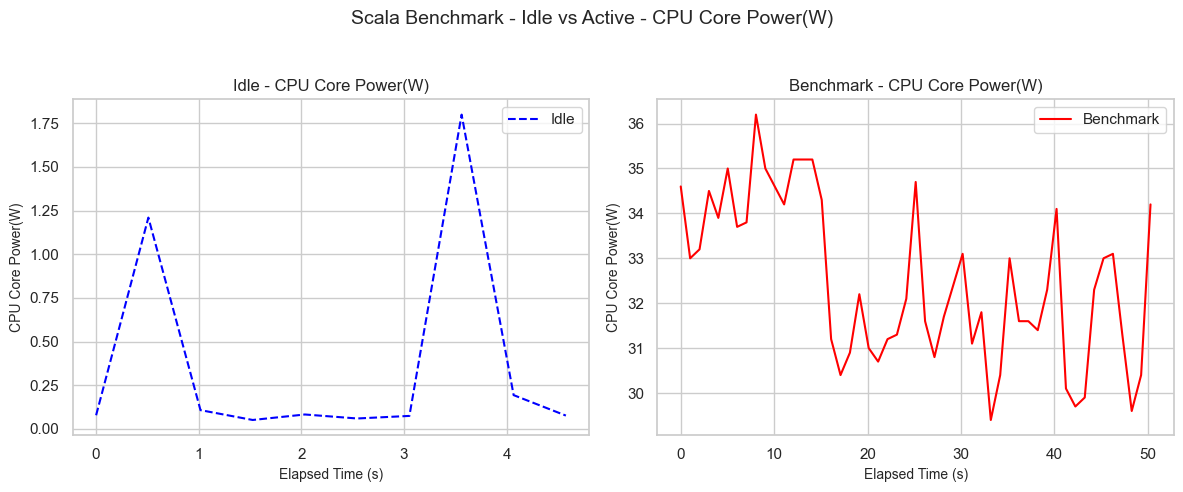

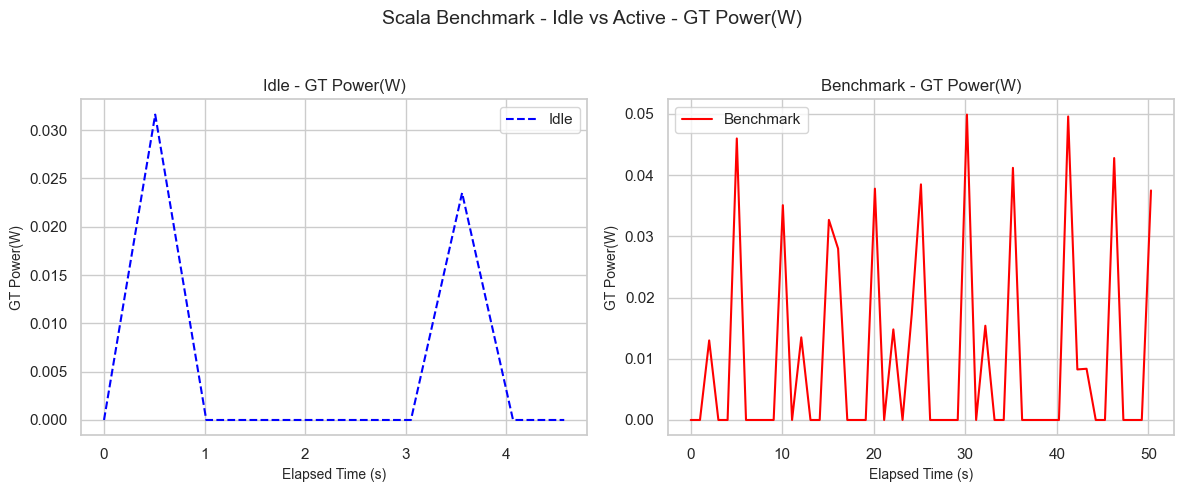

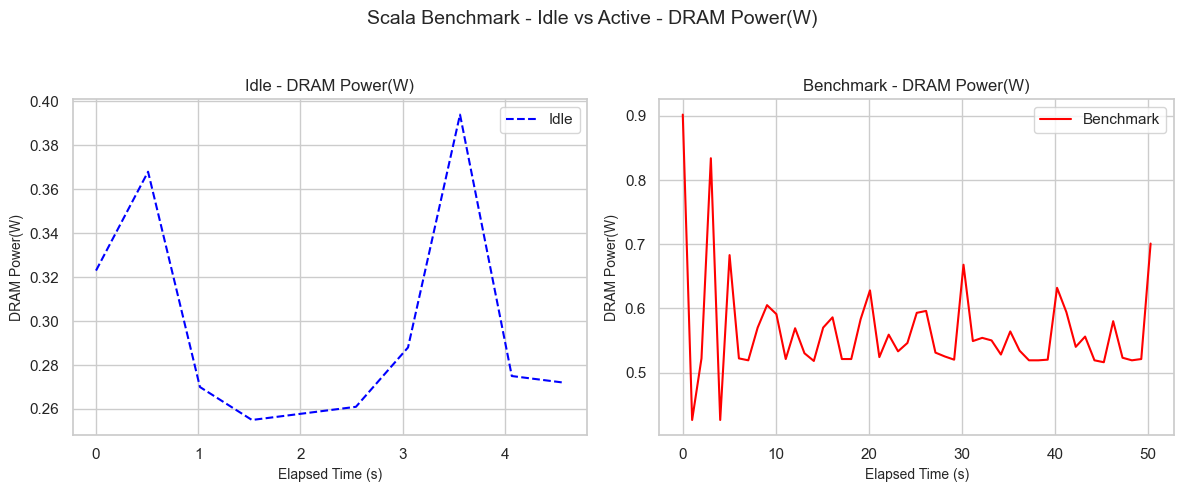

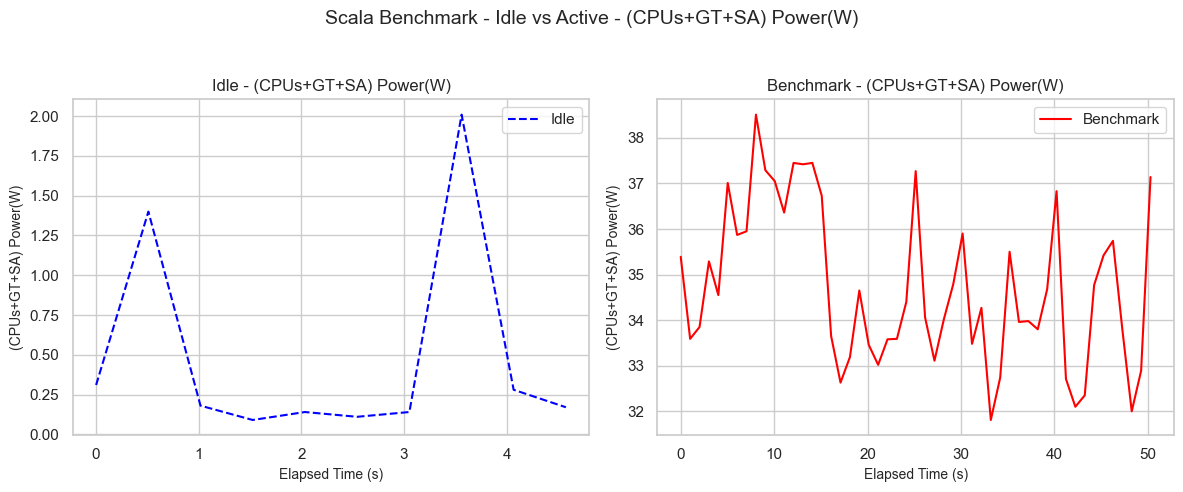

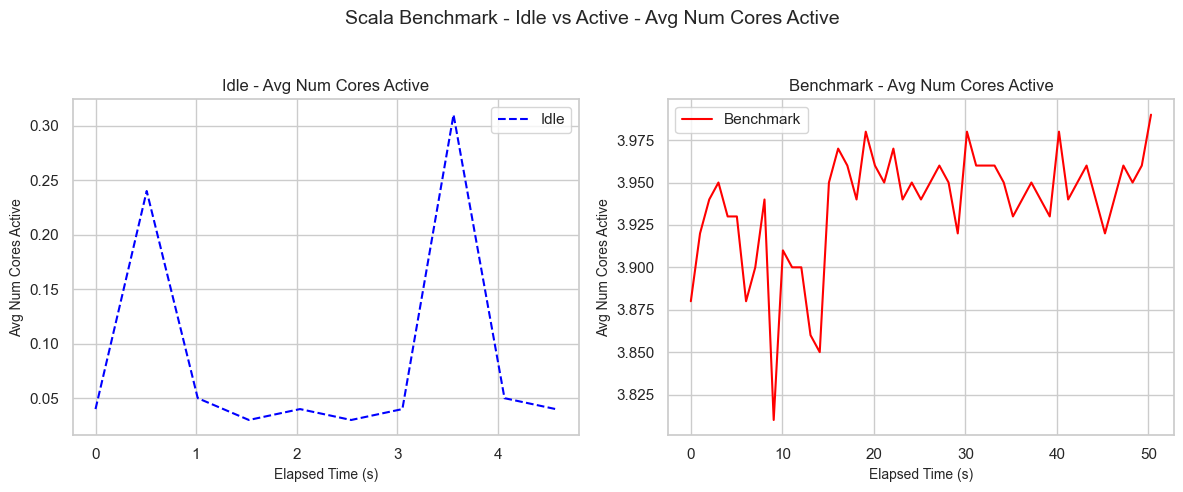

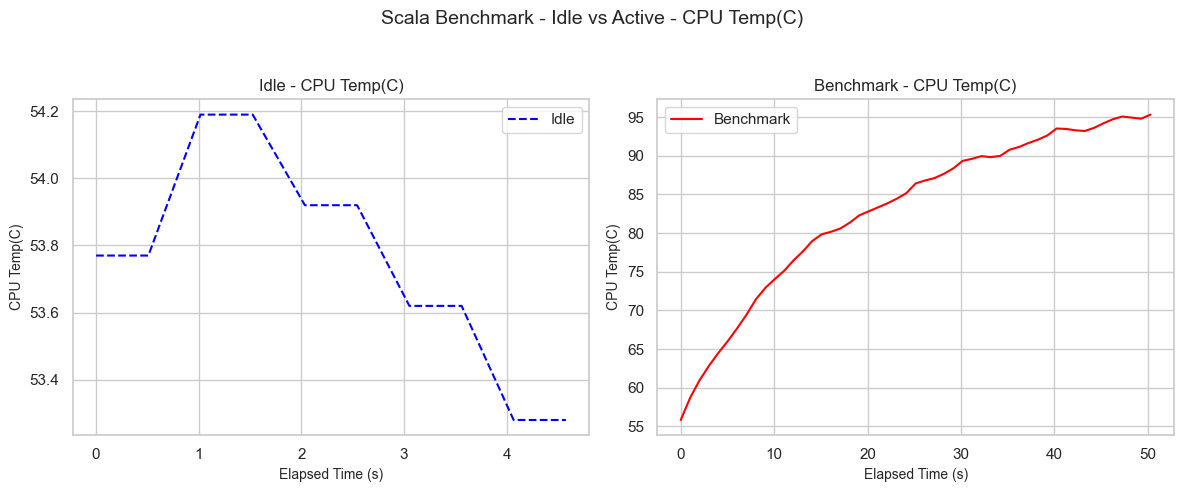

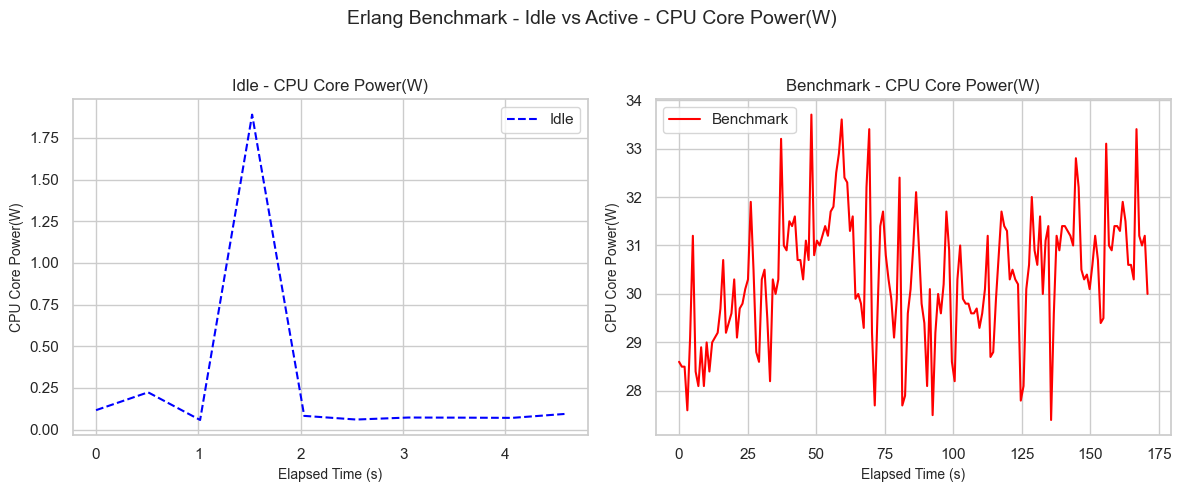

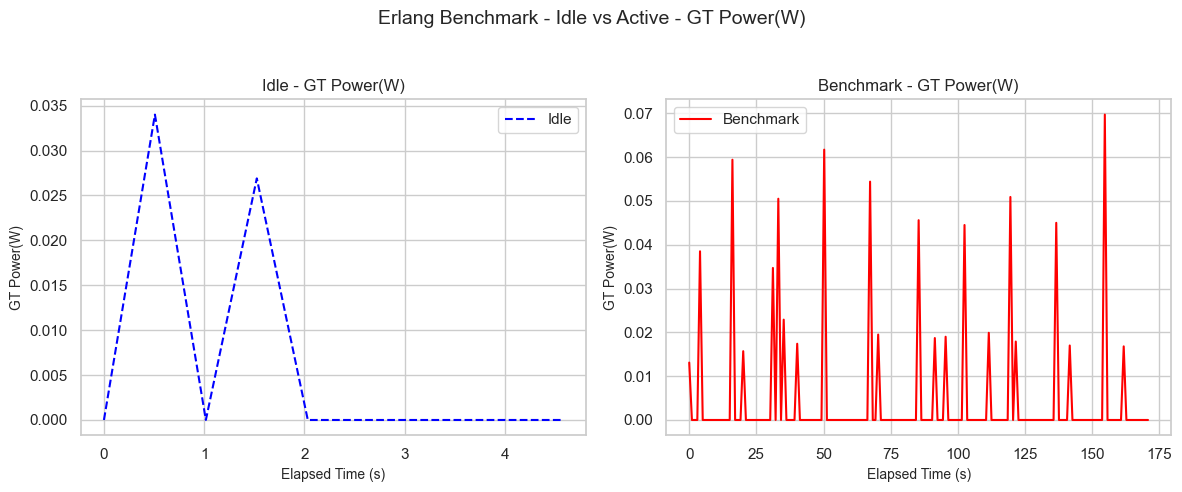

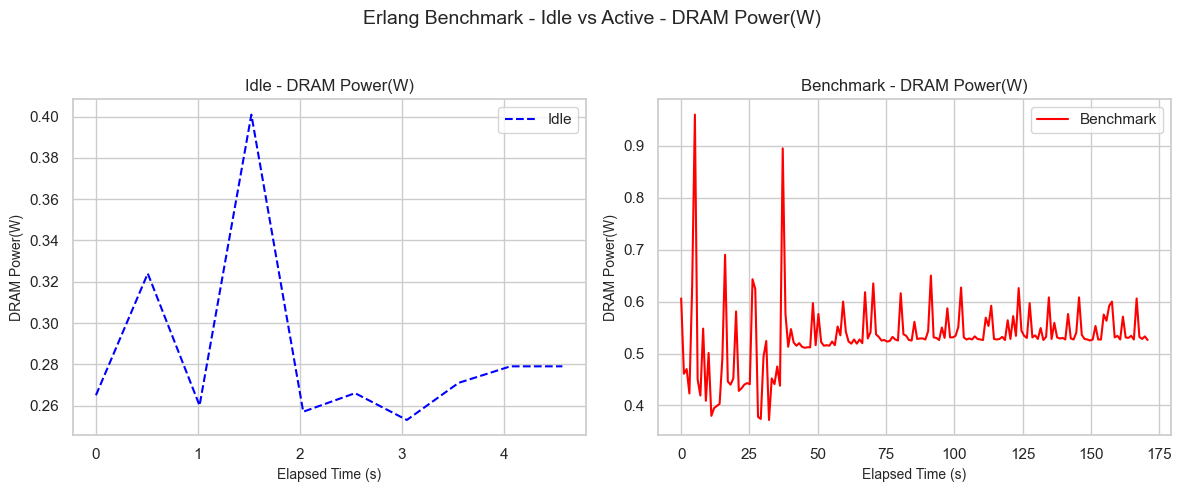

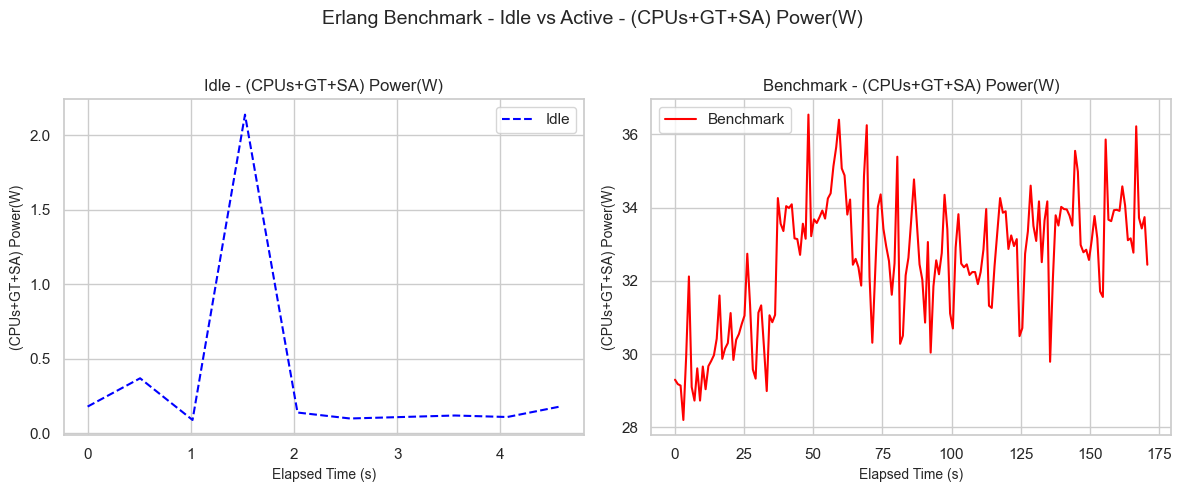

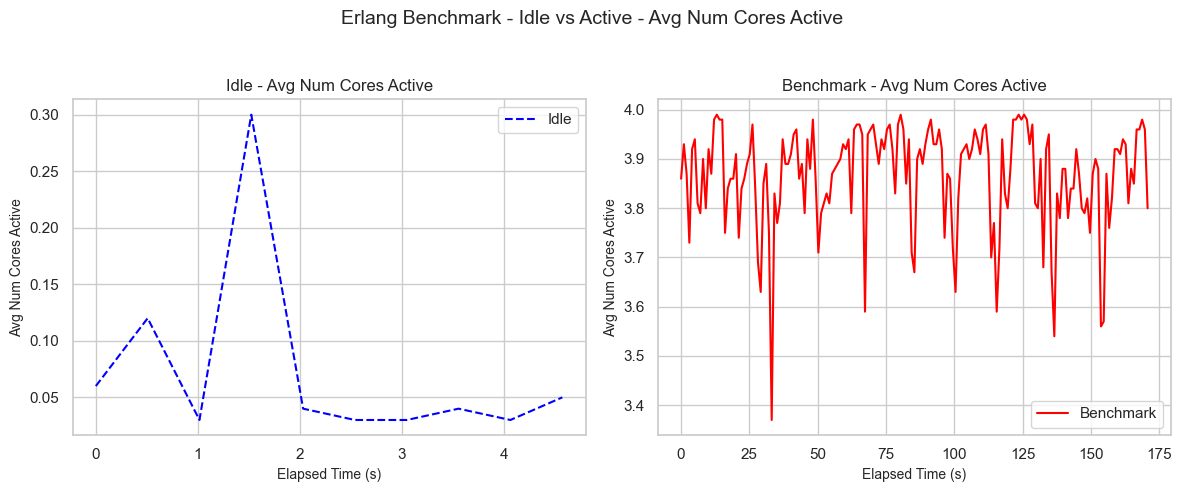

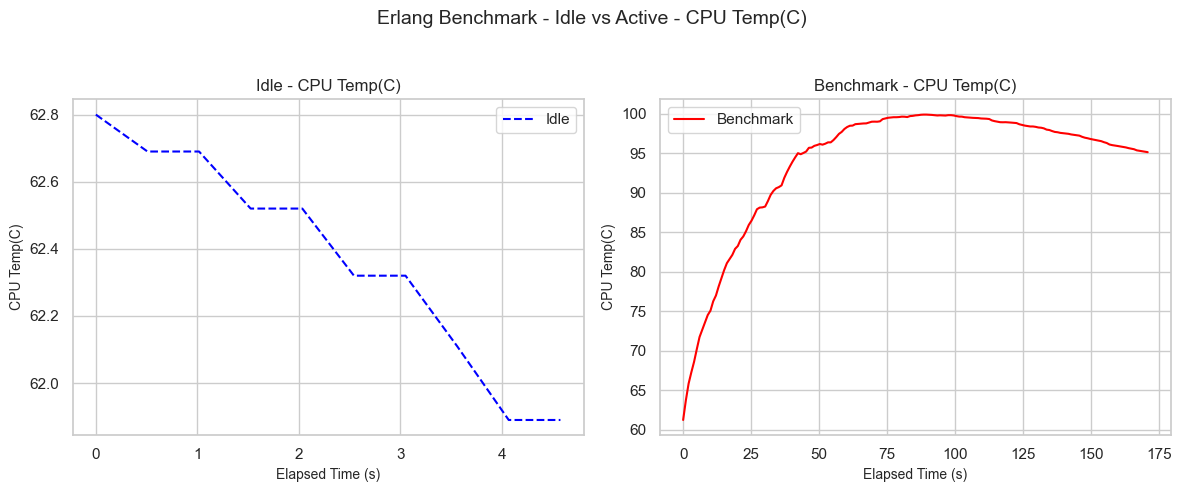

In [35]:
plot_graphs(scala_idle_data, scala_bench_data, "Scala Benchmark - Idle vs Active")
plot_graphs(erlang_idle_data, erlang_bench_data, "Erlang Benchmark - Idle vs Active")

In [36]:
def plot_erlang_vs_scala(erlang_df, scala_df, idle_erlang_df, idle_scala_df, title_prefix):
    """
    Plots Erlang and Scala benchmark data with elapsed time starting at t=0,
    after subtracting corresponding idle values.
    """
    columns_to_plot = [
        "CPU Core Power(W)", "GT Power(W)", "DRAM Power(W)", 
        "(CPUs+GT+SA) Power(W)", "Avg Num Cores Active", "CPU Temp(C)"
    ]

    sns.set_theme(style="whitegrid", palette="muted")

    # Create a copy of the dataframes to avoid modifying the original data
    erlang_df = erlang_df.copy()
    scala_df = scala_df.copy()

    # Normalize elapsed time to start from t=0
    erlang_df["Elapsed Time (s)"] = (erlang_df["Time Elapsed (ms)"].cumsum() - erlang_df["Time Elapsed (ms)"].iloc[0]) / 1000
    scala_df["Elapsed Time (s)"] = (scala_df["Time Elapsed (ms)"].cumsum() - scala_df["Time Elapsed (ms)"].iloc[0]) / 1000


    for column in columns_to_plot:
        fig, ax = plt.subplots(figsize=(10, 5))

        # Subtract idle values
        erlang_df["Adjusted " + column] = np.maximum(0, erlang_df[column] - idle_erlang_df[column].mean())
        scala_df["Adjusted " + column] = np.maximum(0, scala_df[column] - idle_scala_df[column].mean())

        # Plot Erlang benchmark
        sns.lineplot(data=erlang_df, x="Elapsed Time (s)", y="Adjusted " + column, label="Erlang", color='blue', ax=ax)

        # Plot Scala benchmark
        sns.lineplot(data=scala_df, x="Elapsed Time (s)", y="Adjusted " + column, label="Scala", color='red', ax=ax)

        # Main figure title
        ax.set_title(f"{title_prefix} - {column}", fontsize=14)
        ax.set_xlabel("Elapsed Time (s)", fontsize=12)
        ax.set_ylabel(column, fontsize=12)
        ax.legend()
        ax.grid(True)

        plt.tight_layout()
        plt.show()


In [37]:
def format_number_str(num):
    """Formats large numbers into shortened notation (e.g., 1B, 100M, 10M)."""
    if num >= 1_000_000_000:
        return f"{num // 1_000_000_000}B"
    elif num >= 1_000_000:
        return f"{num // 1_000_000}M"
    elif num >= 1_000:
        return f"{num // 1_000}K"
    return str(num)

n = format_number_str(N)
m = format_number_str(M)
title_config_prefix = f"({n} Philosophers, {m} Eating Rounds, {ITERATIONS} Iterations)"

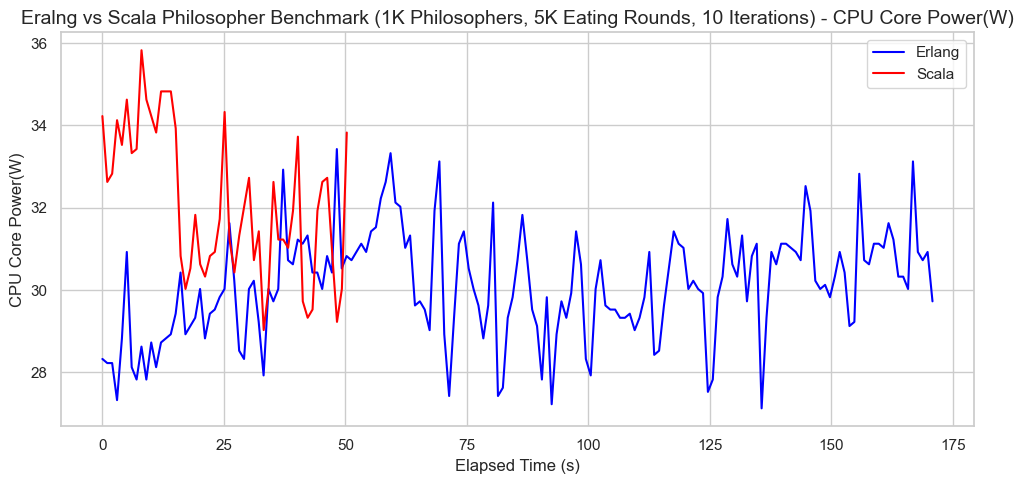

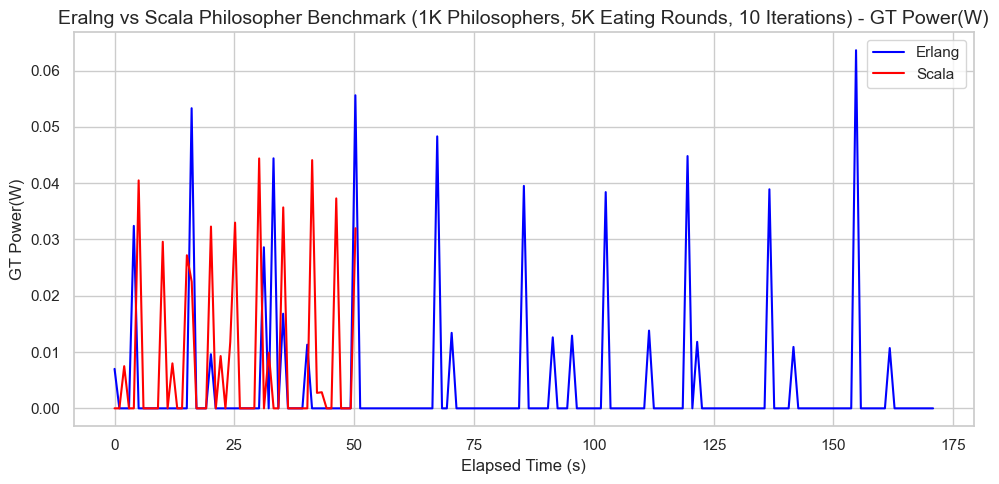

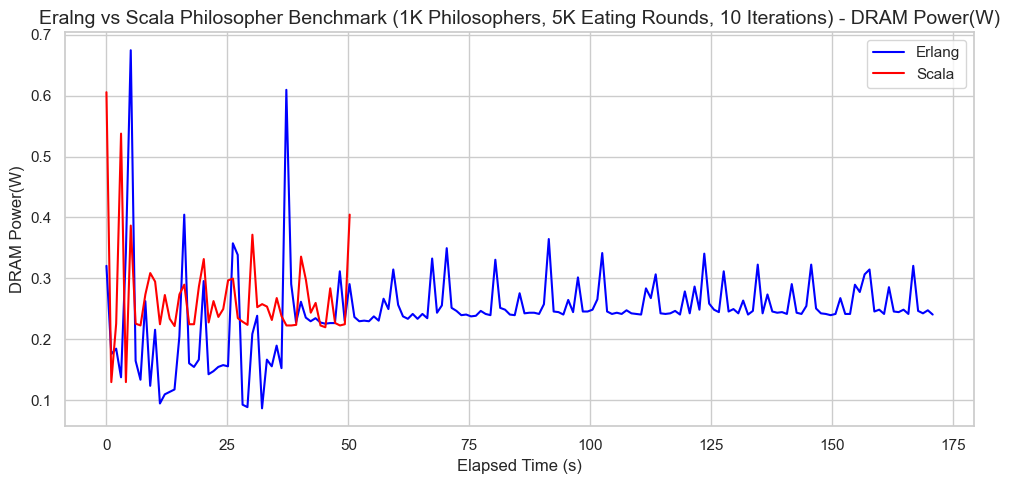

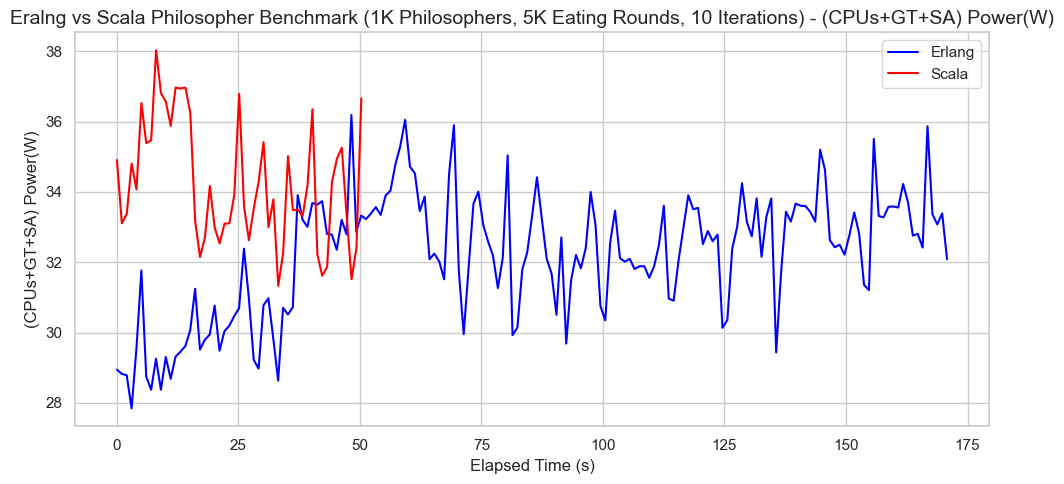

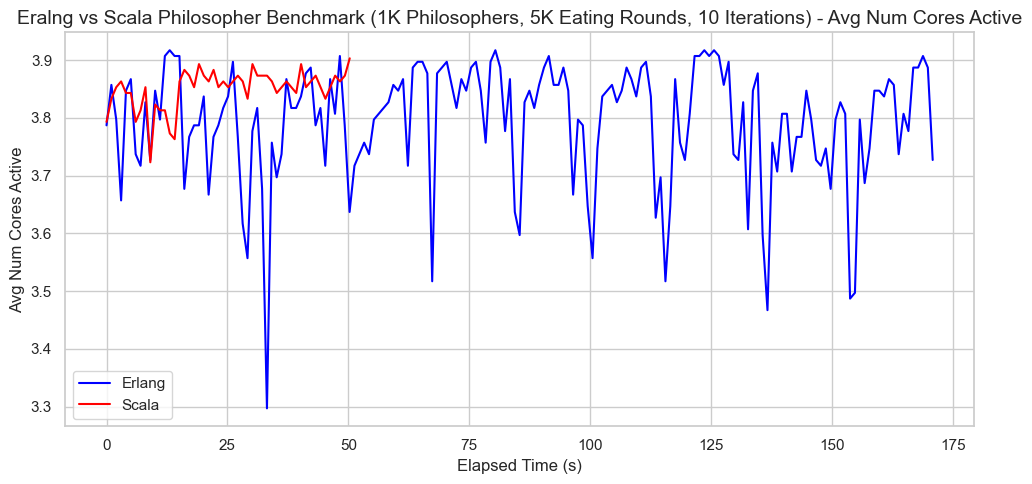

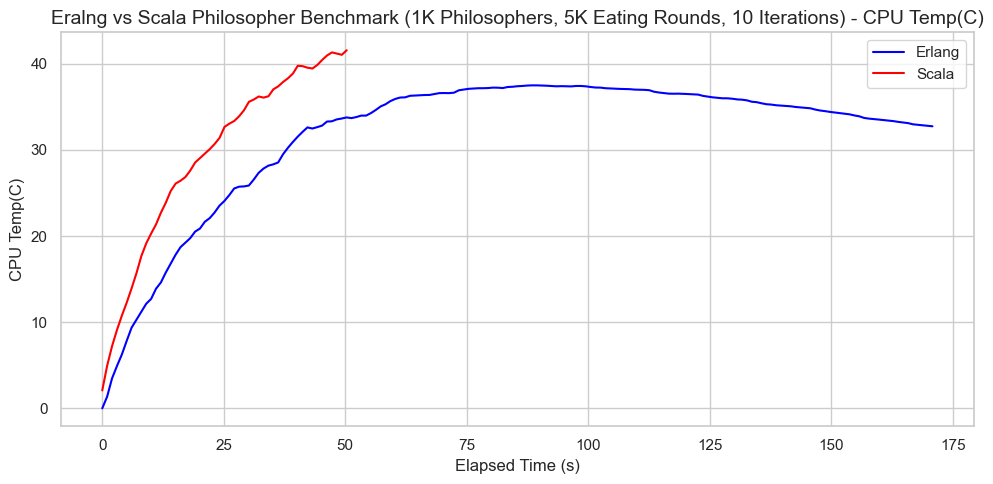

In [38]:
plot_erlang_vs_scala(erlang_bench_data, scala_bench_data, erlang_idle_data, scala_idle_data, f"Eralng vs Scala Philosopher Benchmark {title_config_prefix}")


Compute Average Metrics

In [39]:
metrics_columns = ["CPU Core Power(W)", "GT Power(W)", "DRAM Power(W)", "(CPUs+GT+SA) Power(W)","CPU Temp(C)", "Avg Num Cores Active"]

In [40]:
# Compute mean idle values for each metric
scala_idle_means = scala_idle_data[metrics_columns].mean()
erlang_idle_means = erlang_idle_data[metrics_columns].mean()

# Subtract the mean idle values from each row in the benchmark data
scala_net_avgs = (scala_bench_data[metrics_columns] - scala_idle_means).mean()
erlang_net_avgs = (erlang_bench_data[metrics_columns] - erlang_idle_means).mean()

print("Net Average Metrics Comparison:\n")
print("Scala Benchmark:")
print(scala_net_avgs, "\n")
print("Erlang Benchmark:")
print(erlang_net_avgs)

Net Average Metrics Comparison:

Scala Benchmark:
CPU Core Power(W)        32.121198
GT Power(W)               0.004877
DRAM Power(W)             0.267914
(CPUs+GT+SA) Power(W)    34.243471
CPU Temp(C)              29.308902
Avg Num Cores Active      3.849863
dtype: float64 

Erlang Benchmark:
CPU Core Power(W)        30.095925
GT Power(W)              -0.001688
DRAM Power(W)             0.246360
(CPUs+GT+SA) Power(W)    32.198807
CPU Temp(C)              31.664181
Avg Num Cores Active      3.792673
dtype: float64


Compute Total Energy Consumption

In [41]:
# Calculate total elapsed time
scala_total_time = scala_bench_data["Time Elapsed (ms)"].sum() / 1000
erlang_total_time = erlang_bench_data["Time Elapsed (ms)"].sum() / 1000

# Calculate total elapsed time using timestamps (convert to seconds)
# scala_total_time = (scala_bench_data["Timestamp"].iloc[-1] - scala_bench_data["Timestamp"].iloc[0]).total_seconds()
# erlang_total_time = (erlang_bench_data["Timestamp"].iloc[-1] - erlang_bench_data["Timestamp"].iloc[0]).total_seconds()

# Compute total energy consumption
# scala_total_energy = scala_net_avgs["(CPUs+GT+SA) Power(W)"] * scala_total_time
# erlang_total_energy = erlang_net_avgs["(CPUs+GT+SA) Power(W)"] * erlang_total_time

scala_total_energy = (scala_net_avgs["CPU Core Power(W)"] + scala_net_avgs["DRAM Power(W)"]) * scala_total_time
erlang_total_energy = (erlang_net_avgs["CPU Core Power(W)"] + erlang_net_avgs["DRAM Power(W)"]) * erlang_total_time


# Create a DataFrame for the new row
new_row = pd.DataFrame([{
    "Iterations": ITERATIONS,
    "N": N,
    "M": M,
    "Erlang Energy Consumption(J)": erlang_total_energy,
    "Scala Energy Consumption(J)": scala_total_energy
}])

# Define CSV file path
csv_filename = os.path.join(parent_dir, "aggregate_energy_results.csv")

# Check if the file exists
if os.path.exists(csv_filename):
    # Load existing data
    existing_data = pd.read_csv(csv_filename)
    
    # Check if the row with the same (Number of Messages, Iterations) already exists
    duplicate_row = existing_data[
        (existing_data["N"] == N) & 
        (existing_data["M"] == M) &
        (existing_data["Iterations"] == ITERATIONS)
    ]
    
    if not duplicate_row.empty:
        print("Skipping duplicate entry for N =", N, "M =", M, "and Iterations =", ITERATIONS)
    else:
        # Append new row
        new_row.to_csv(csv_filename, mode='a', header=False, index=False)
        print("Results appended to", csv_filename)
else:
    # Save with header if file does not exist
    new_row.to_csv(csv_filename, mode='w', header=True, index=False)
    print("File created and results saved to", csv_filename)

# Print the computed values
print("\nTotal Energy Consumption Comparison:")
print("Scala Benchmark:", scala_total_energy,"Joules")
print("Erlang Benchmark:", erlang_total_energy,"Joules")


Results appended to ../../../data/philosopher/3/aggregate_energy_results.csv

Total Energy Consumption Comparison:
Scala Benchmark: 1661.2248905446042 Joules
Erlang Benchmark: 5212.860711297588 Joules
